<a href="https://colab.research.google.com/github/Talha1818/Introduction-to-Modelling-Machine-Learning/blob/master/ML_Engineer_Evaluation_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Validation dataset

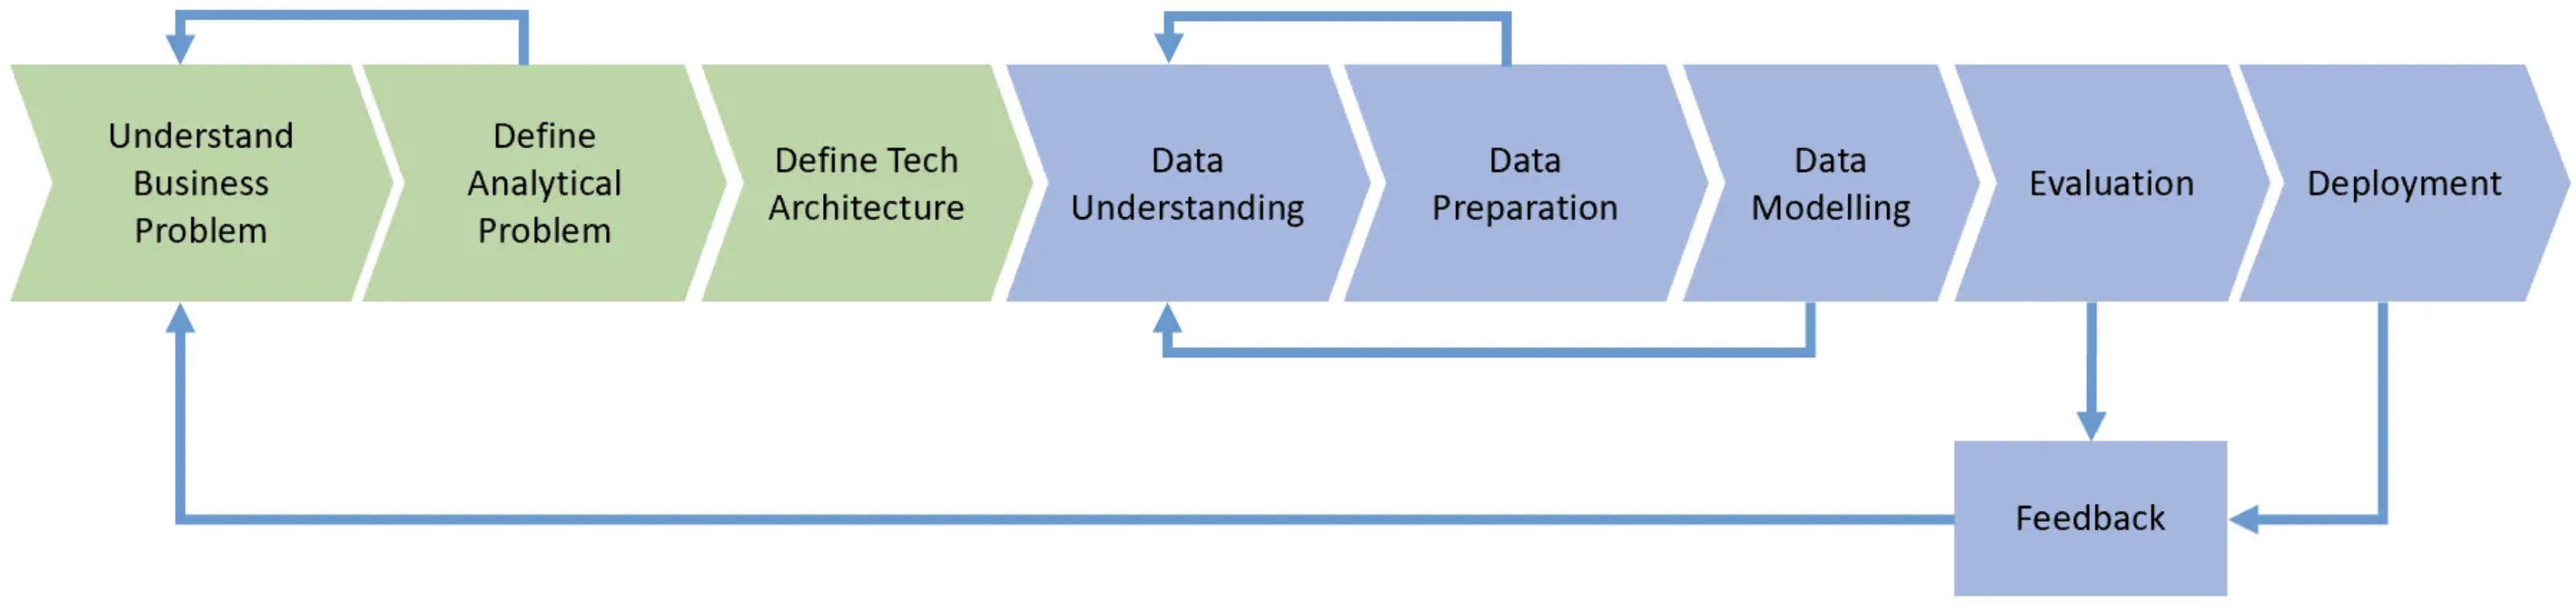

https://medium.com/@DataScienceKen/the-data-science-process-part-2-defining-the-project-4cbb75464965

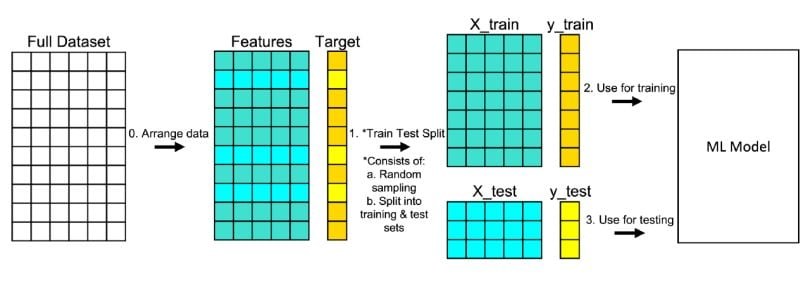

https://builtin.com/data-science/train-test-split

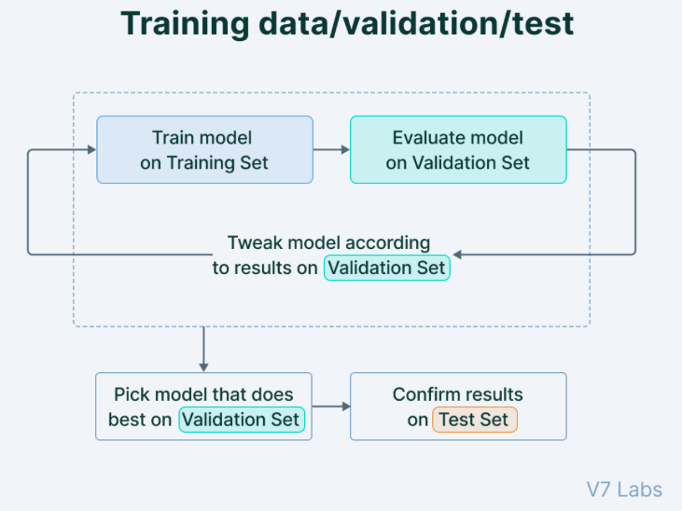

https://www.v7labs.com/blog/train-validation-test-set

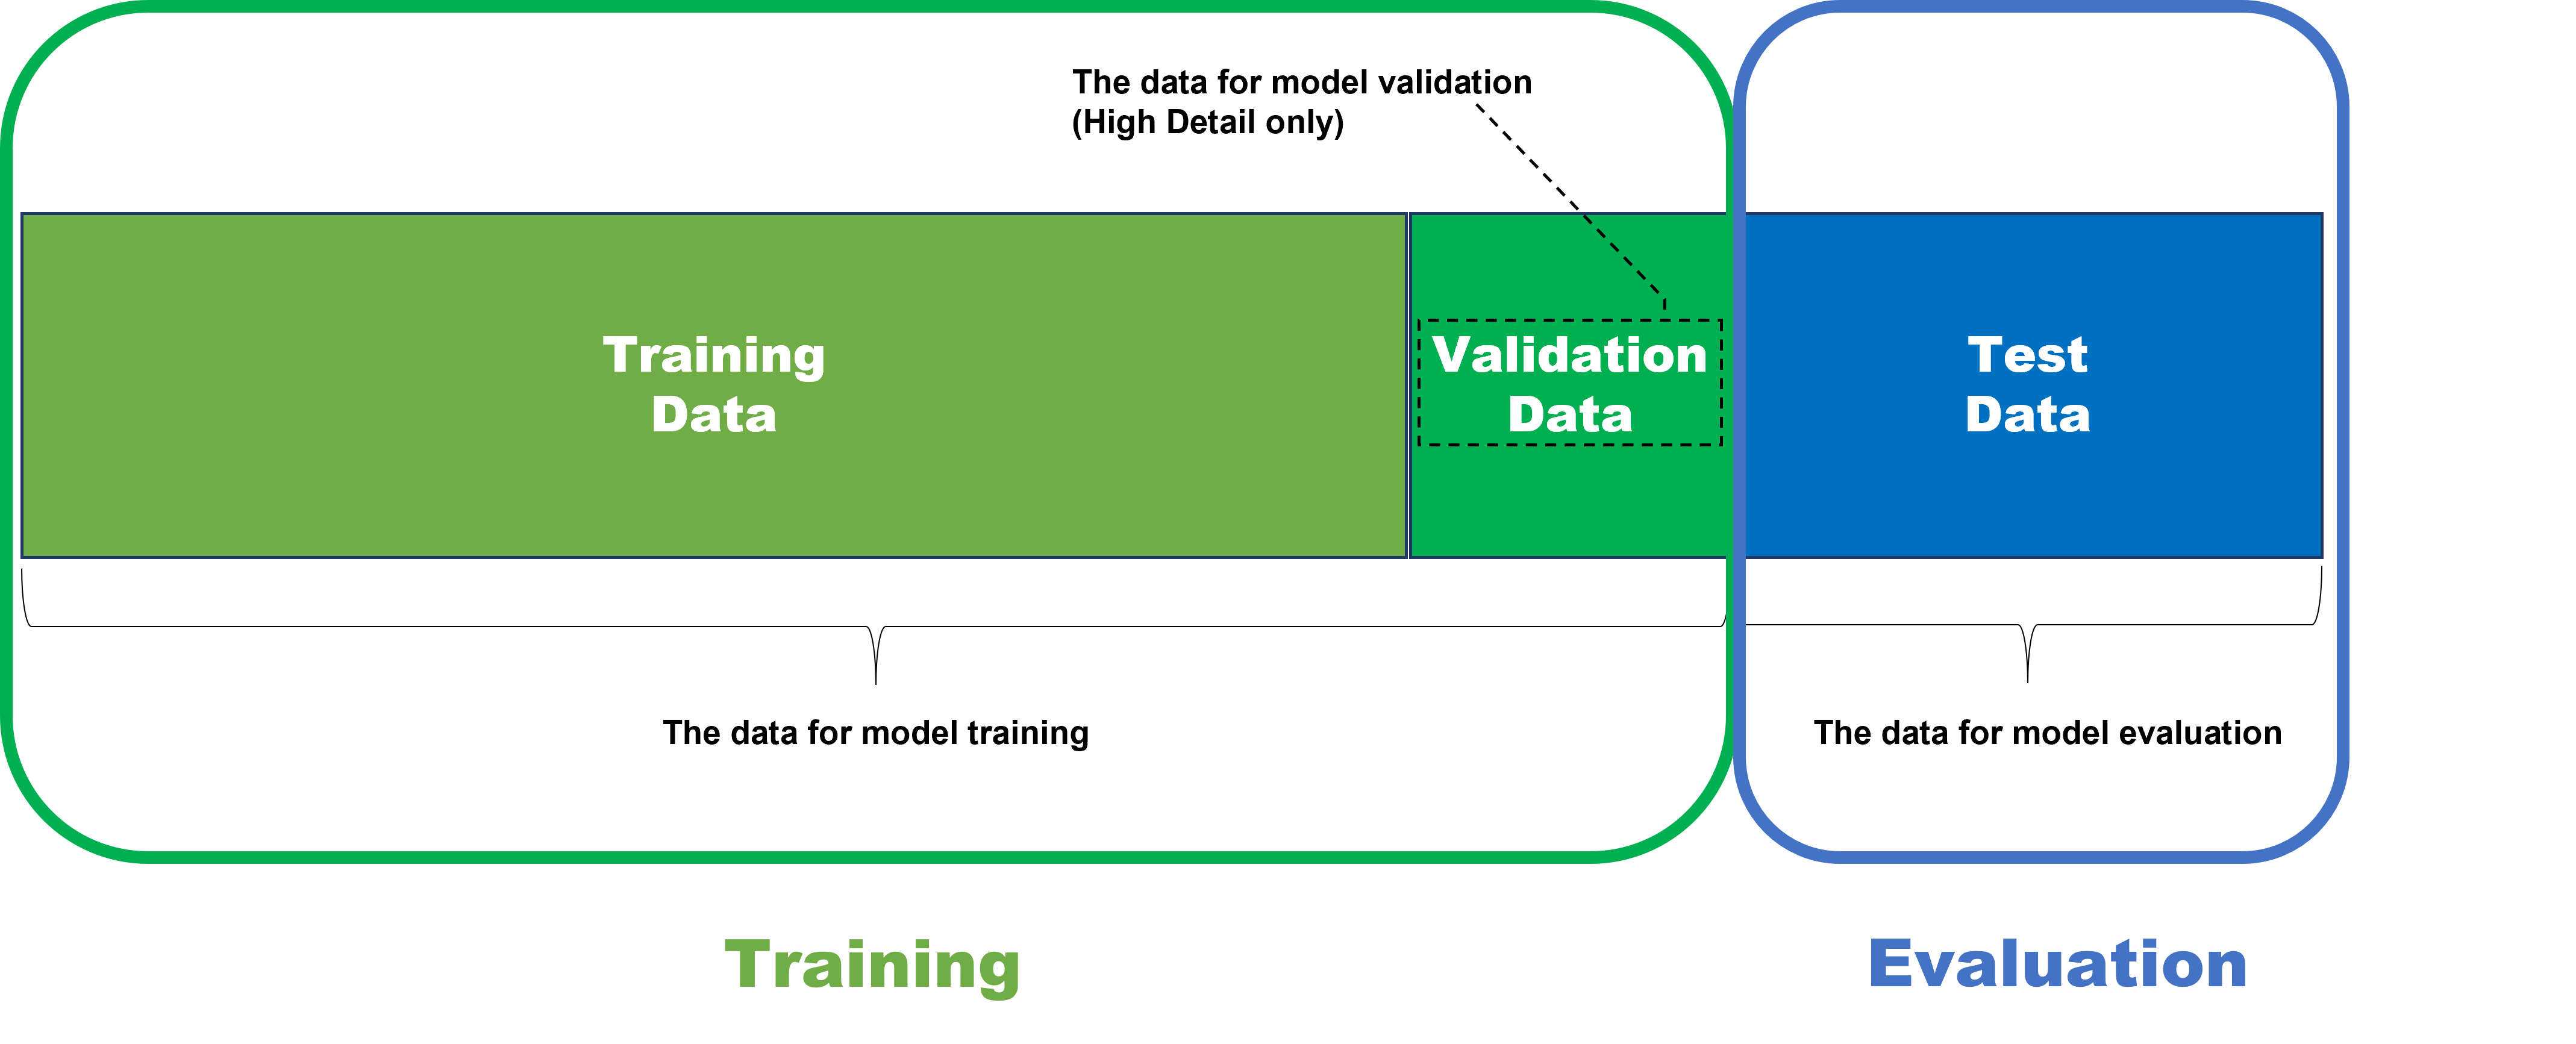

https://support.cognex.com/docs/deep-learning_301/web/EN/deep-learning/Content/deep-learning-Topics/training-red-foc-sup/prepare-train-test.htm?TocPath=Red%20%EB%B6%84%EC%84%9D%20Focused%20%EC%A7%80%EB%8F%84%20%EB%8F%84%EA%B5%AC%20%ED%95%99%EC%8A%B5%7C_____6

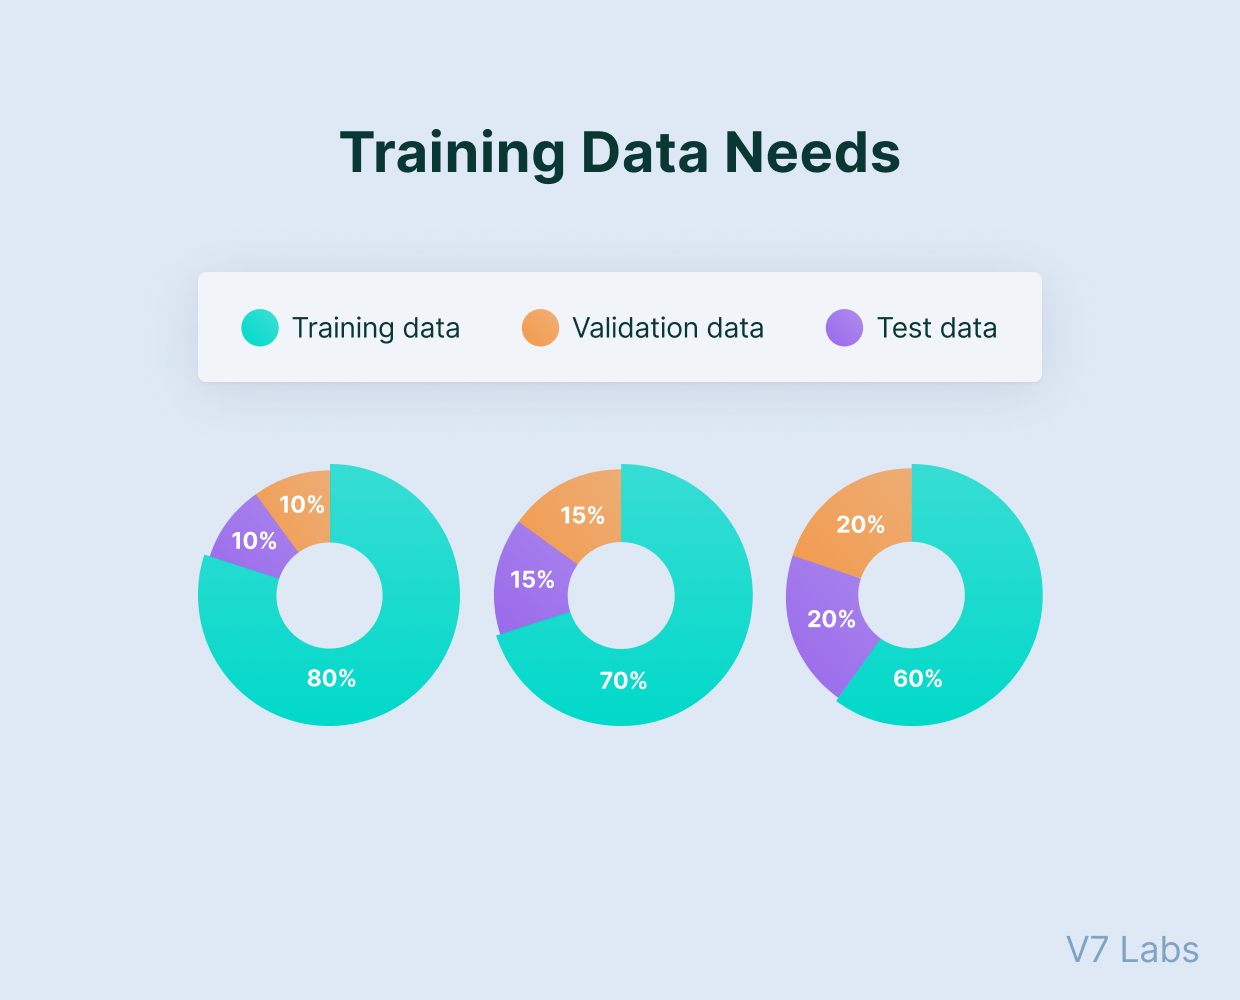

https://www.v7labs.com/blog/train-validation-test-set

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("artifacts/preprocessed_data/saved_dataframe_new.csv")
y = df["V24"]
X = df.drop(columns="V24")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33/2, random_state=42)

X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33/2, random_state=20)

# K-Fold Validation

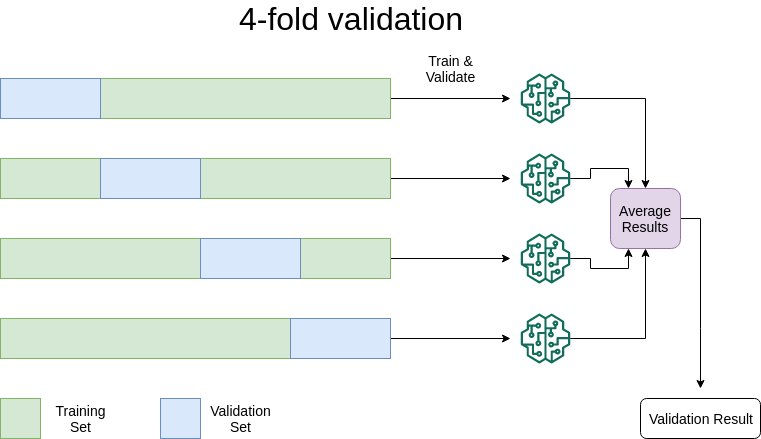

https://www.brainstobytes.com/test-training-and-validation-sets/

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)
kf.get_n_splits(X)
print(kf)
for i, (train_index, cv_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  CV:  index={cv_index}")

KFold(n_splits=2, random_state=None, shuffle=False)
Fold 0:
  Train: index=[150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298 299]
  CV:  index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  

In [ ]:
train_index

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=500)
rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=0)
rf.fit(X_train, y_train)
y_cv_pred = rf.predict(X_test)
cv_accuracy = accuracy_score(y_test, y_cv_pred)
cv_accuracy

0.8686868686868687

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
accuracies = []

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

kf = KFold(n_splits=5)
kf.get_n_splits(X_train)
print(kf)
for i, (train_index, cv_index) in enumerate(kf.split(X_train)):
    clf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=0)
    clf.fit(X_train.iloc[train_index], y_train.iloc[train_index])
    y_train_pred = clf.predict(X_train.iloc[train_index])
    y_cv_pred = clf.predict(X_train.iloc[cv_index])
    train_accuracy = accuracy_score(y_train[train_index], y_train_pred)
    cv_accuracy = accuracy_score(y_train[cv_index], y_cv_pred)
    print("CV Accuracy:", cv_accuracy)
    accuracies.append(cv_accuracy)
print("Mean CV accuracy: ", np.mean(accuracies))

KFold(n_splits=5, random_state=None, shuffle=False)
CV Accuracy: 0.926829268292683
CV Accuracy: 0.9
CV Accuracy: 0.825
CV Accuracy: 0.8
CV Accuracy: 0.9
Mean CV accuracy:  0.8703658536585367


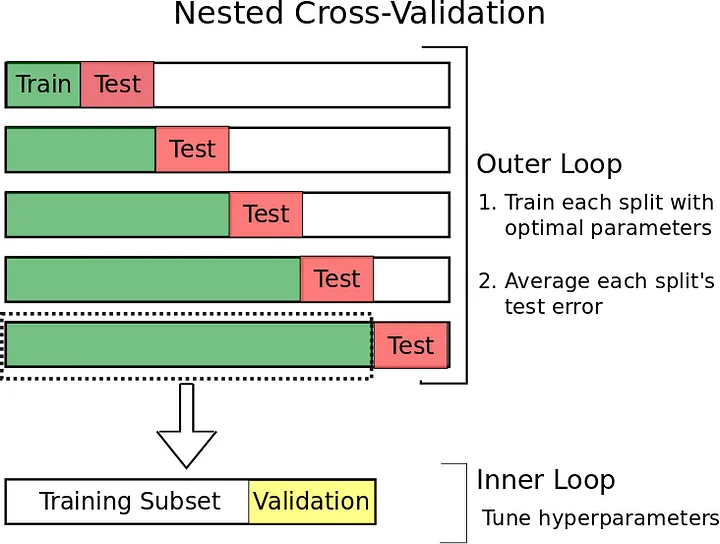

https://towardsdatascience.com/time-series-nested-cross-validation-76adba623eb9

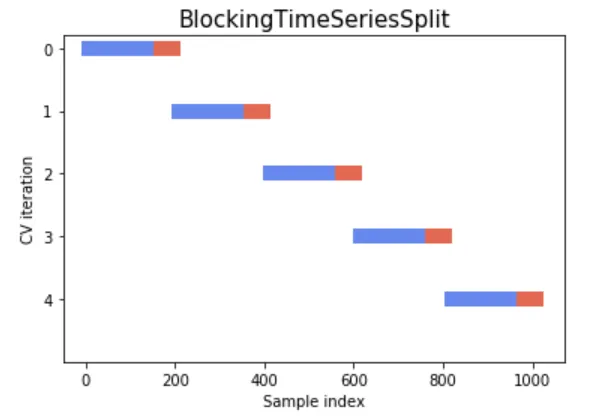

https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4

# Metrics for Classification

### Confusion Matrix

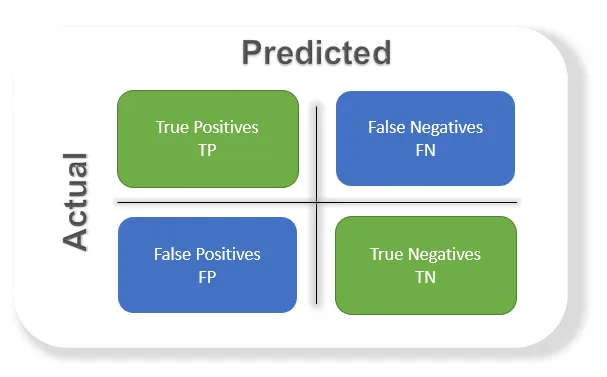

https://towardsdatascience.com/various-ways-to-evaluate-a-machine-learning-models-performance-230449055f15

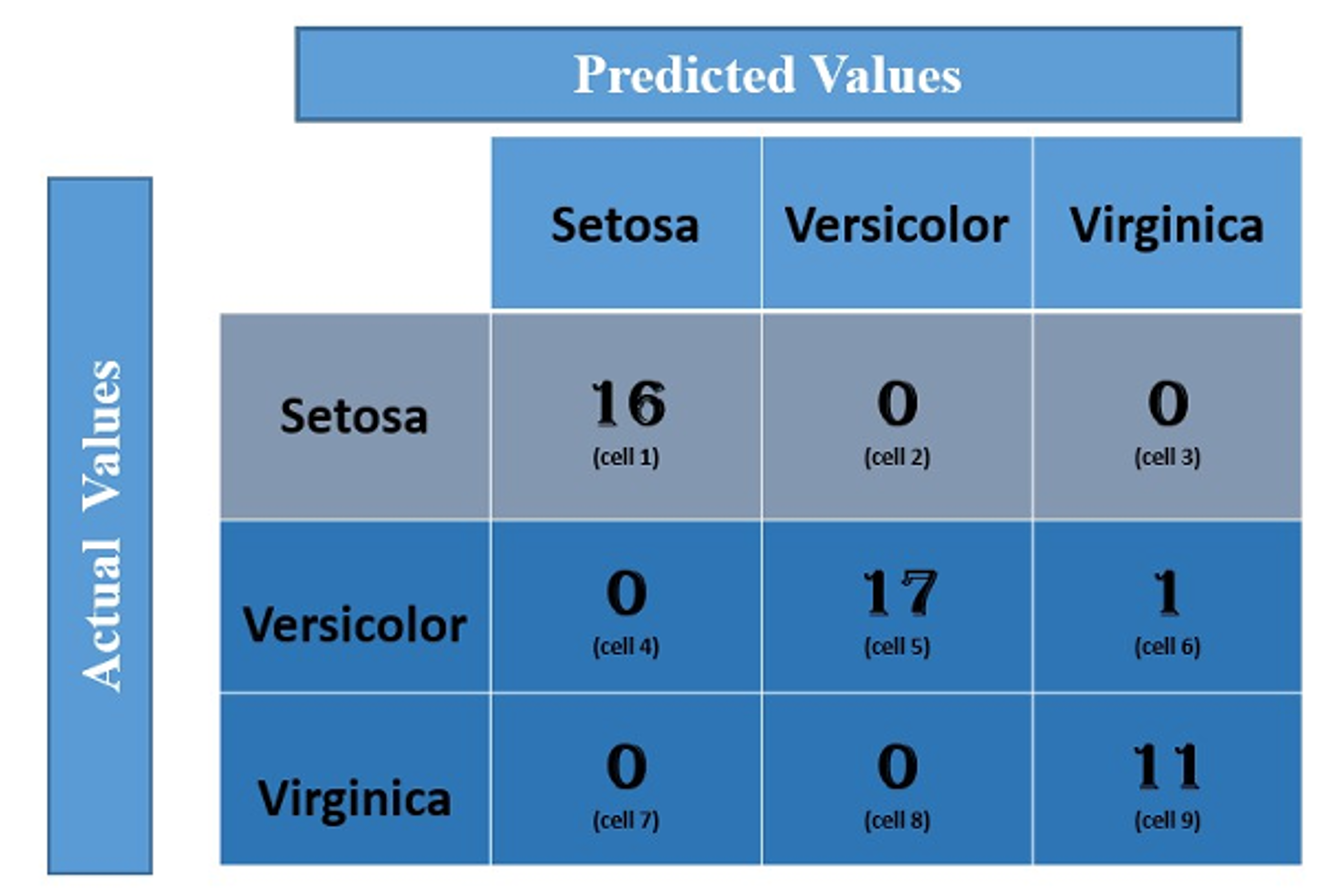

https://www.analyticsvidhya.com/blog/2021/06/confusion-matrix-for-multi-class-classification/

In [ ]:
from sklearn.metrics import confusion_matrix
y_test_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix for the Test Set:\n", conf_matrix)

Confusion Matrix for the Test Set:
 [[71  1]
 [11 16]]


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

In [ ]:
print(tp)
print(tn)
print(fp)
print(fn)

16
71
1
11


### Classification Accuracy

$$
\frac{TP + TN}{TP + FP + TN + FN}
$$


In [ ]:
accuracy_score(y_test, y_test_pred)

0.8787878787878788

### Precision

Precision refers to the proportion of positive identifications that were actually correct.

$$
\frac{TP}{TP + FP}
$$

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_test_pred)
print("Precision:", precision)

Precision: 0.9411764705882353


### Recall

Recall is the proportion of actual positive cases that were correctly identified by the model.

$$
\frac{TP}{TP + FN}
$$

In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_test_pred)
print("Recall:", recall)

Recall: 0.5925925925925926


### F1 score

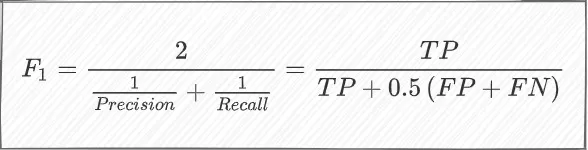

https://towardsdatascience.com/is-f1-the-appropriate-criterion-to-use-what-about-f2-f3-f-beta-4bd8ef17e285

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_test_pred)
print("F1 Score:", f1)

F1 Score: 0.7272727272727272


### Fbeta score

beta > 1 gives more weight to recall, while beta < 1 favors precision

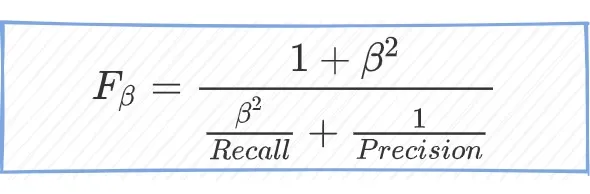

In [ ]:
from sklearn.metrics import fbeta_score
fbeta_05 = fbeta_score(y_test, y_test_pred, beta=0.5)
print("F-beta Score (beta=0.5):", fbeta_05)

fbeta_2 = fbeta_score(y_test, y_test_pred, beta=2)
print("F-beta Score (beta=2):", fbeta_2)

fbeta_3 = fbeta_score(y_test, y_test_pred, beta=3)
print("F-beta Score (beta=3):", fbeta_3)

F-beta Score (beta=0.5): 0.8421052631578948
F-beta Score (beta=2): 0.64
F-beta Score (beta=3): 0.6153846153846153


### ROC curve and AUC

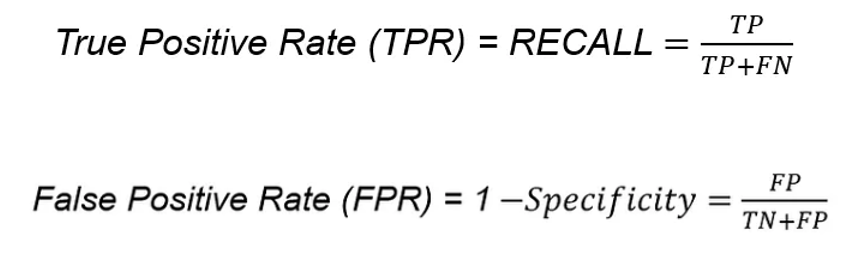

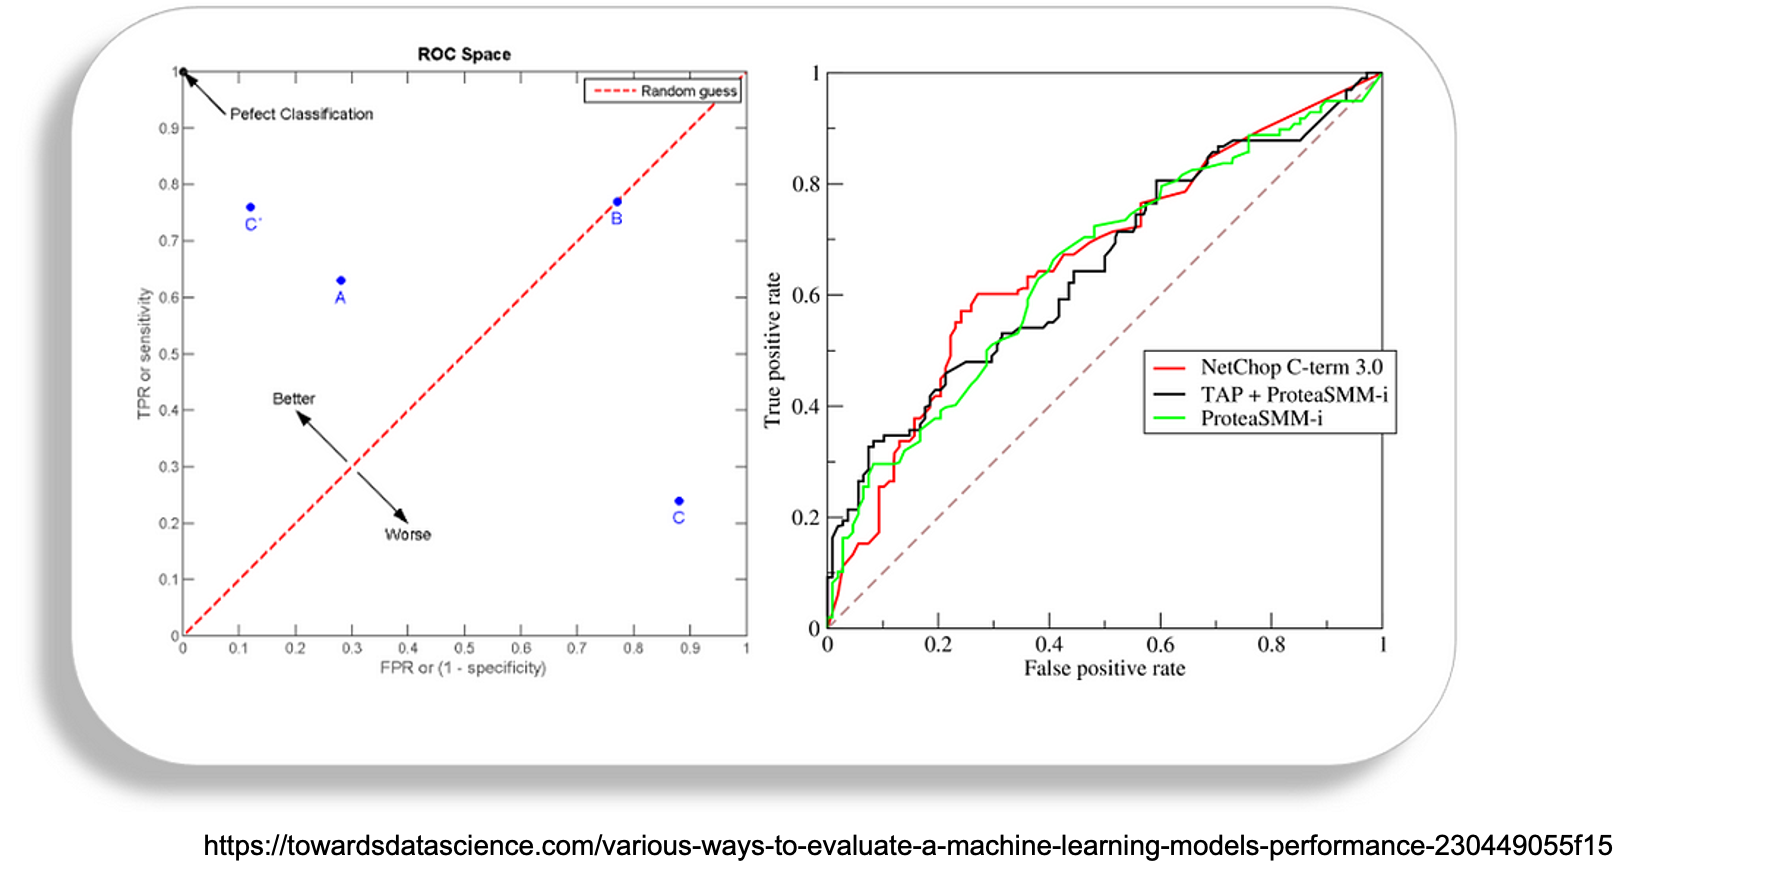

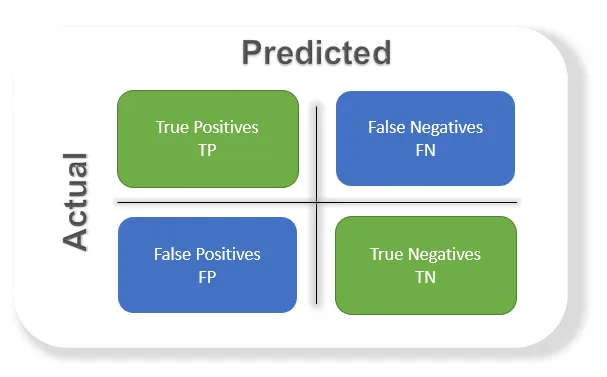

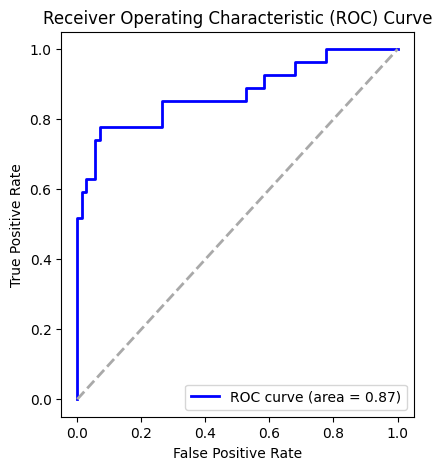

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_test_probs = clf.predict_proba(X_test)[:, 1]

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_test_probs)
roc_auc = roc_auc_score(y_test, y_test_probs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkgrey', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

### Precision-Recall curve (PR-AUC)

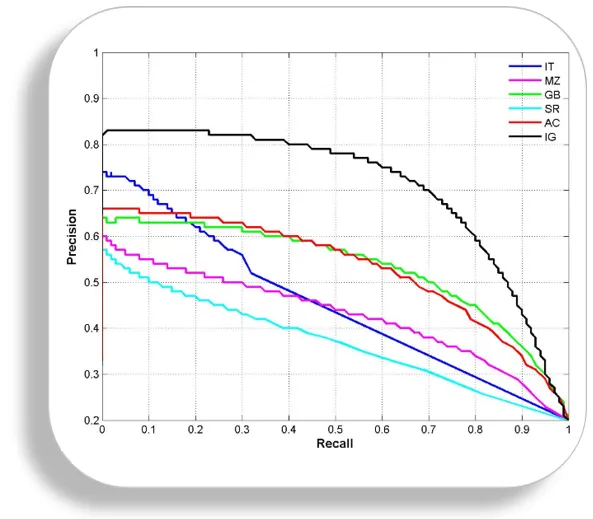

https://towardsdatascience.com/various-ways-to-evaluate-a-machine-learning-models-performance-230449055f15

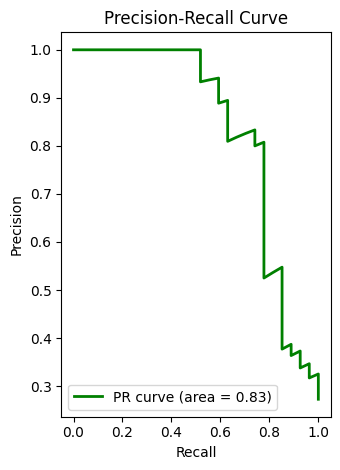

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, _ = precision_recall_curve(y_test, y_test_probs)
pr_auc = auc(recall, precision)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

### Which metrics to use for Classification?

Accuracy: If we have a balanced dataset and want to pre-determine the threshold (above which we consider the predicted value positive, and below it negative) and desire the simplest, most easily presentable value.

Precision: If it's particularly important to us that when the ML says something is positive, we can trust it to be truly positive.

Sensitivity (Recall): If we mainly want to know what percentage of all positive cases the ML detects.

F1 score: If both precision and sensitivity are important to us, or we want to adjust which one is more important to us (F-beta score). We primarily use it when we're more interested in predicting positive cases, and our data is unbalanced. Its main advantage over PR-AUC is that it's easier to communicate to business stakeholders.

ROC-AUC: If our dataset is relatively balanced, both precision and sensitivity are important to us, positive and negative cases are equally important, and we want to see the results for different threshold values.

PR-AUC: If our dataset is unbalanced, mainly the positive cases are important to us and we want to see the results for different threshold values.

# Metrics for Regression

### MAE (Mean Absolute Error)

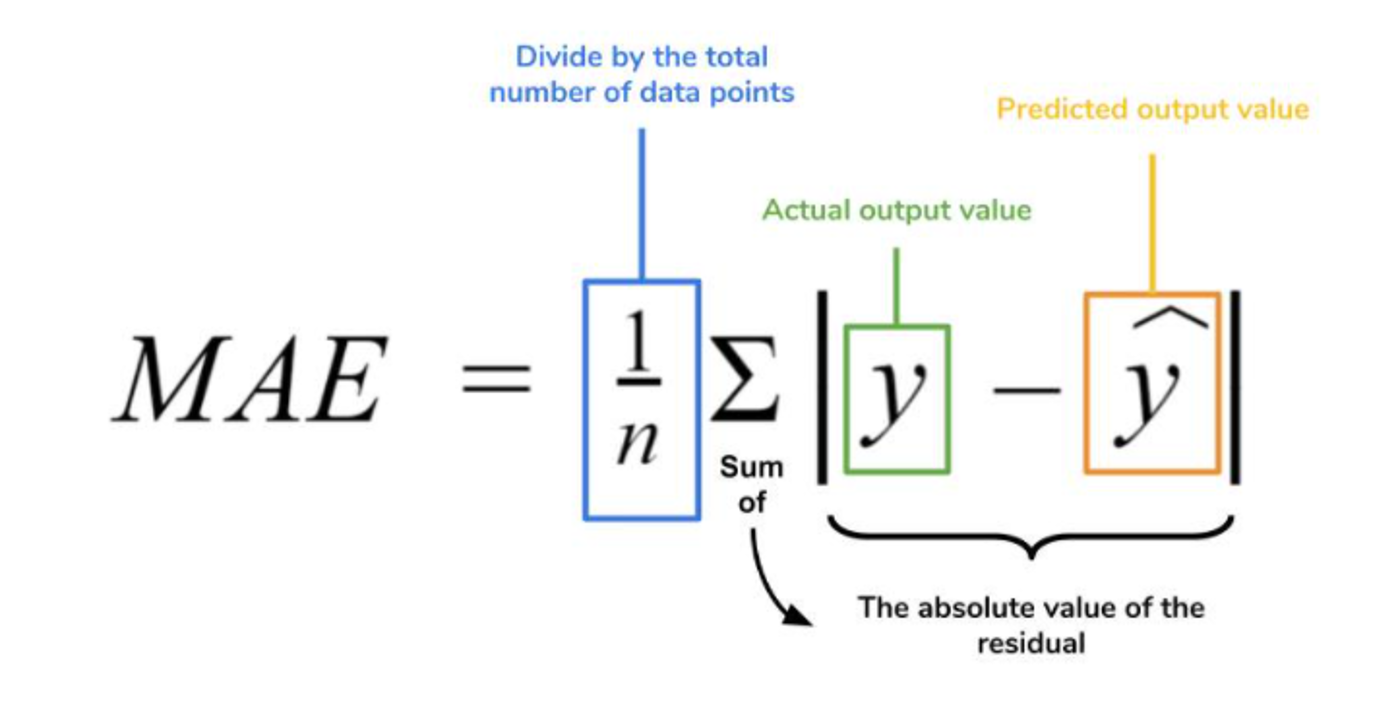

https://medium.com/@polanitzer/the-minimum-mean-absolute-error-mae-challenge-928dc081f031

In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()

data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

print(data.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = data.drop(columns=["target"])
y = data["target"].values.reshape(-1, 1)
scaler = MinMaxScaler()
#y = scaler.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
regr = RandomForestRegressor(n_estimators = 20, max_depth=5, random_state=0)
regr.fit(X_train, y_train)
y_pred_train = regr.predict(X_train)
y_pred_test = regr.predict(X_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
print(mae_train)
print(mae_test)
print(np.mean(y_test))

33.08683606531273
43.54909725475161
152.43835616438355


<ipython-input-21-2cfd5c0bcce4>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


### MAPE (Mean Absolute Percentage Error)

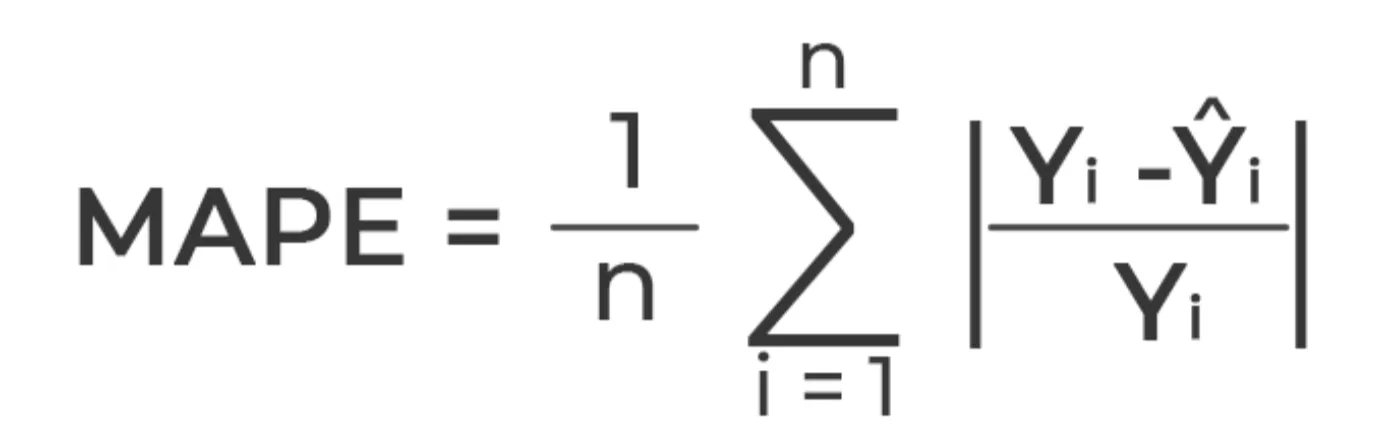

https://medium.com/trusted-data-science-haleon/mape-vs-mae-which-metric-is-better-68dd559cbfb1

In [ ]:
mape_train = np.mean(np.abs((y_train[:, 0] - y_pred_train) / y_train)) * 100
mape_test = np.mean(np.abs((y_test[:, 0] - y_pred_test) / y_test[:, 0])) * 100
print(mape_train)
print(mape_test)

29.772416908108834
37.37329578507798


### MSE (Mean Squared Error)

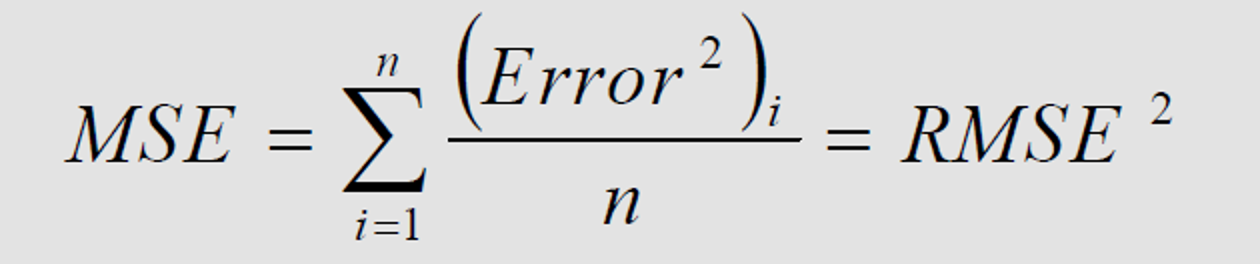

https://medium.com/@polanitzer/the-minimum-mean-absolute-error-mae-challenge-928dc081f031

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test[:, 0], y_pred_test)
print(mse)

3005.332951608312


### RMSE (Root Mean Square Error)

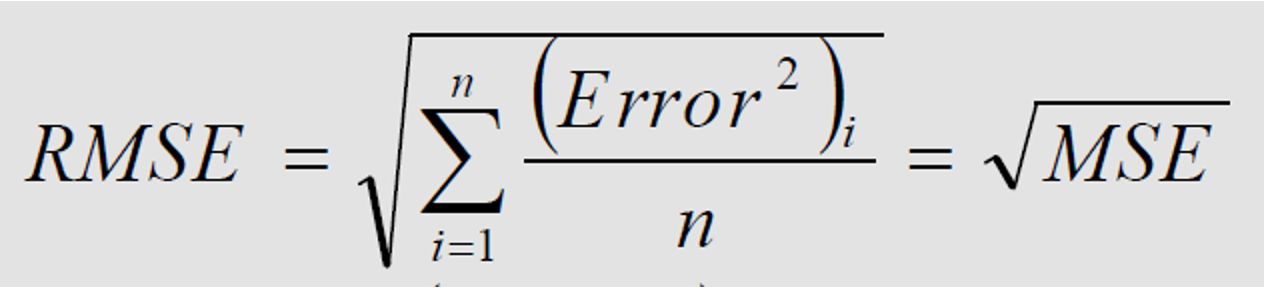

https://medium.com/@polanitzer/the-minimum-mean-absolute-error-mae-challenge-928dc081f031

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mse)
print(rmse)

54.8209170992999


### R2 score (Coefficient of Determination)

Total sum of squares

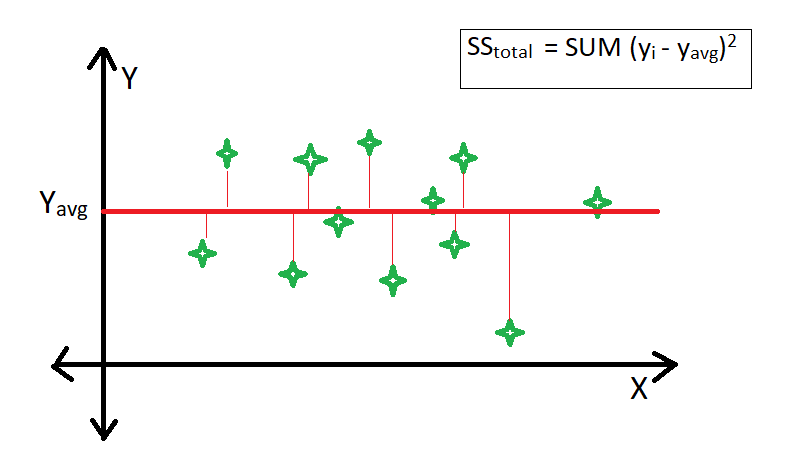

Residual sum of squares

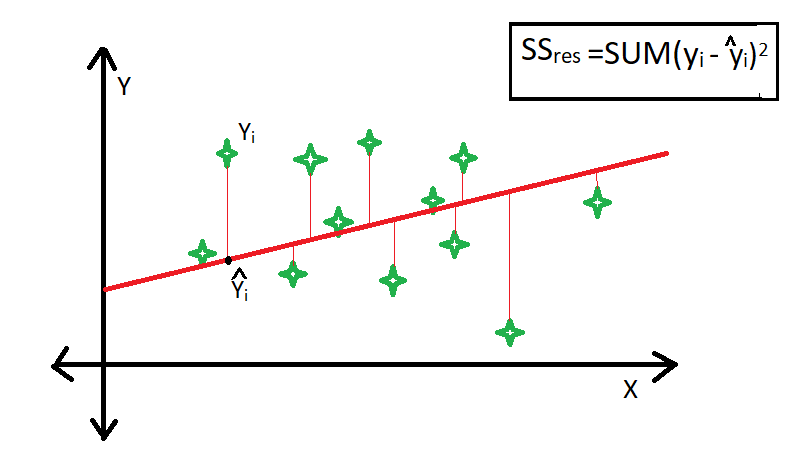

https://www.geeksforgeeks.org/ml-r-squared-in-regression-analysis/

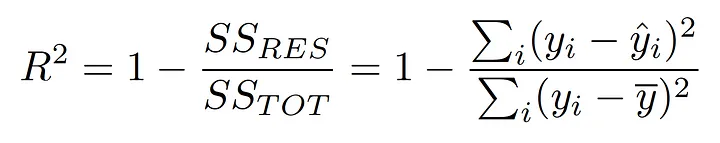

https://medium.com/@erika.dauria/looking-at-r-squared-721252709098

https://library.virginia.edu/data/articles/is-r-squared-useless

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test[:, 0], y_pred_test)
print(r2)

0.477811079860348


### Which metrics to use for regression?

MAE: Excellent for explaining model performance to business clients. However, it does not penalize larger errors more severely, therefore it is not recommended for use during optimization.


MAPE: Useful for providing a quick and intuitive percentage-based measure to business stakeholders, but it can be computational error if the actual values contain zeros.


MSE, RMSE: Penalize larger errors more, therefore recommended for optimization. But do not use this to explain results to business partners.


R2 score: Problematic for several reasons. Never use it alone for model evaluation.

# Bias - Variance tradeoff - Overfitting - Underfitting

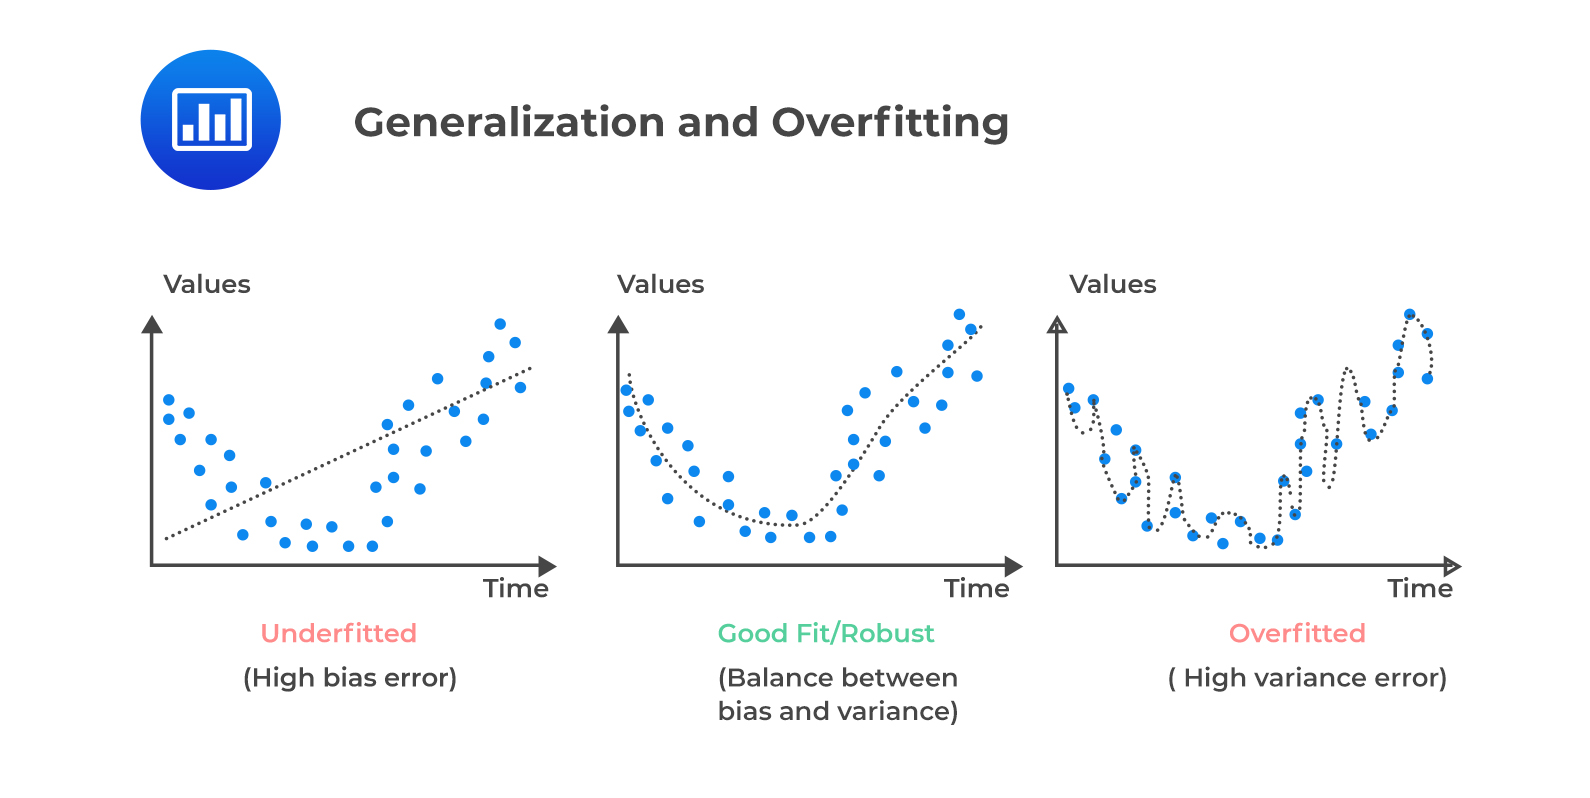

https://analystprep.com/study-notes/cfa-level-2/quantitative-method/overfitting-methods-addressing/

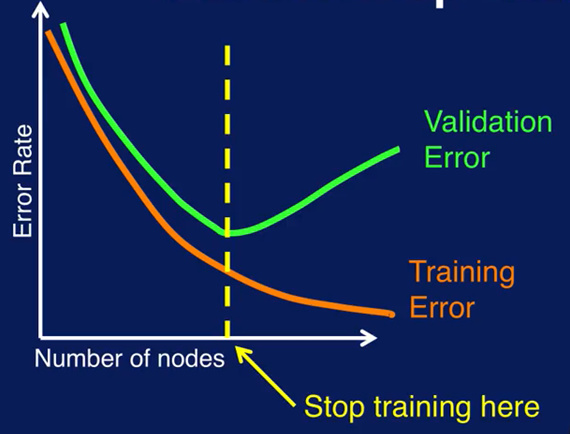

https://www.coursera.org/lecture/big-data-machine-learning/using-a-validation-set-Pb8Cl

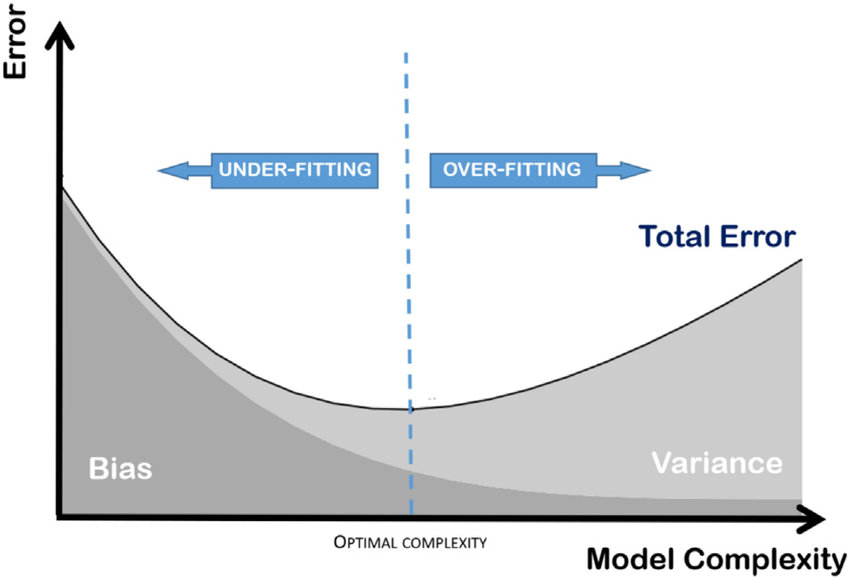

https://www.researchgate.net/publication/342219146_Artificial_intelligence-based_tools_to_control_healthcare_associated_infections_A_systematic_review_of_the_literature

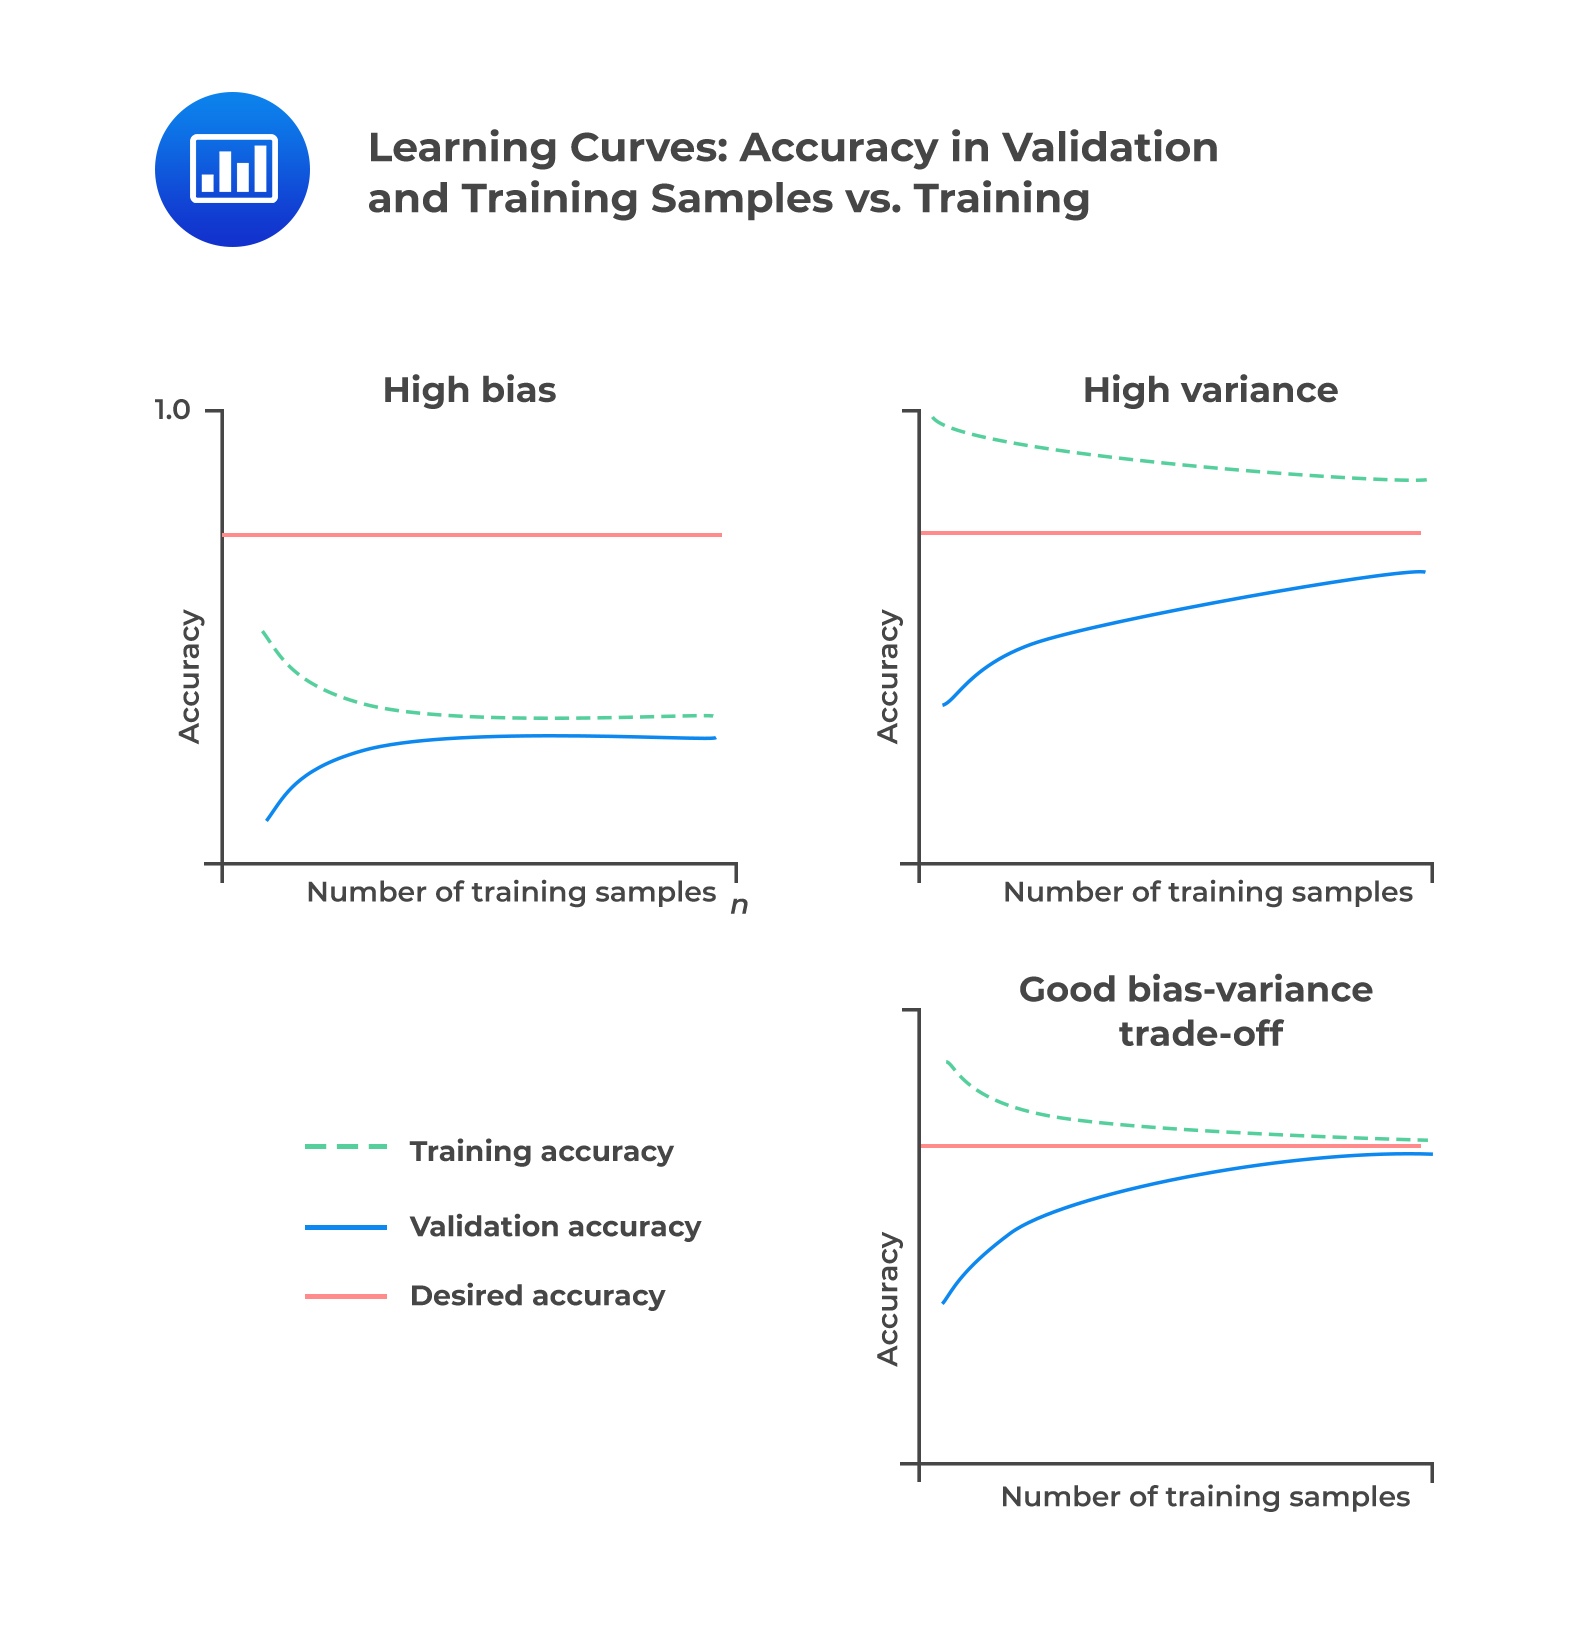

https://analystprep.com/study-notes/cfa-level-2/quantitative-method/overfitting-methods-addressing/

# Optimization

### Optimization Opportunities

*   Data
  * collection (more rows and columns)
  * labeling
  * increasing data quality (with domain knowledge, with programming, with ML)
  * semi-supervised learning
  * public datasets
*   Feature Engineering
  * domain knowledge
*   Models
 * new approach
 * other model architectures (simple or complex)
 * error analysis
 * new features with ML
 * dimension reduction
 * ensemble methods
 * hyper parameter tuning
 * different data preparation techniques (missing value handling, outlier handling, scaling, encoding, etc.)
 * cross-validation
 * transfer learning
 * reading research papers in relevant topics
 * thinking out of the box



# Optimization of Linear Regression

In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

diabetes = load_diabetes()

data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

#print(data.head())

X = data.drop(columns=["target"])
y_orig = data["target"].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0.01, 1))  # Because of MAPE

y = scaler.fit_transform(y_orig)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

#print("Model coefficients:", linear_reg_model.coef_)
#print("Intercept:", linear_reg_model.intercept_)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf.get_n_splits(X_train)

mape = []
for i, (train_index, cv_index) in enumerate(kf.split(X_train)):
    #print(cv_index)
    linear_reg_model = LinearRegression()
    linear_reg_model.fit(X_train.iloc[train_index], y_train[train_index])
    y_train_pred = linear_reg_model.predict(X_train.iloc[train_index])
    y_cv_pred = linear_reg_model.predict(X_train.iloc[cv_index])
    train_mape = np.mean(np.abs((y_train[train_index,0] - y_train_pred[:,0]) / y_train[train_index,0])) * 100
    cv_mape = np.mean(np.abs((y_train[cv_index,0] - y_cv_pred[:,0]) / y_train[cv_index,0])) * 100
    print("CV MAPE:", cv_mape)
    mape.append(cv_mape)
print("Mean CV MAPE: ", np.mean(mape))

CV MAPE: 54.87063075331163
CV MAPE: 43.637300664252834
CV MAPE: 53.312010532103784
CV MAPE: 74.56505800813193
CV MAPE: 128.70377187396656
Mean CV MAPE:  71.01775436635334


# Ridge

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_percentage_error

kf = KFold(n_splits=5, shuffle=True, random_state=42)

alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

alpha_mape = {alpha: [] for alpha in alpha_values}

for alpha in alpha_values:
    for train_index, cv_index in kf.split(X_train):
        ridge_model = Ridge(alpha=alpha)
        ridge_model.fit(X_train.iloc[train_index], y_train[train_index])

        y_cv_pred = ridge_model.predict(X_train.iloc[cv_index])

        cv_mape = mean_absolute_percentage_error(y_train[cv_index], y_cv_pred) * 100
        alpha_mape[alpha].append(cv_mape)

mean_cv_mape_per_alpha = {alpha: np.mean(mapes) for alpha, mapes in alpha_mape.items()}
mean_cv_mape_per_alpha

{0.001: 71.03026074678701,
 0.01: 71.39615263260058,
 0.1: 72.78565285299449,
 1: 83.31869952924839,
 10: 101.09294570795294,
 100: 106.29607109015565}

# Ridge with GridSearchCV

**alpha:** The alpha parameter in Ridge regression is a key component that controls the strength of regularization applied to the model. It is a non-negative float value that balances the amount of emphasis placed on minimizing the model's coefficients versus minimizing the error between the predicted and actual values. A higher alpha value increases the regularization strength, leading to smaller coefficients and potentially a simpler, more generalized model that is less likely to overfit.


**tol (tolerance):** This parameter determines the stopping criterion for the optimization process. The tol is a small positive number that specifies the threshold at which further iterations do not bring significant improvement in the model's accuracy. In simpler terms, if the error measure during the model's training falls below a certain point (which this tol value represents), the training process concludes. This helps prevent excessively long training times and the wastage of resources.


**solver (solving algorithm):** In Ridge regression, the solver parameter determines which algorithm is used to find the weights (or coefficients) that best fit the training data. There are several different types of solving algorithms, and each has its advantages and disadvantages for certain types of datasets. For example, some solvers work better on large datasets, while others may be ideal for smaller datasets or specific mathematical conditions (like sparsity).

alpha: higher less likely to overfit

tol: higher less likely to overfit

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'tol': [1e-4, 1e-3, 1e-2],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

ridge = Ridge()

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid,
                           cv=kf, scoring='neg_mean_absolute_percentage_error',
                           verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train.ravel())  # y_train.ravel() to convert y_train to 1D array

best_params = grid_search.best_params_
best_score = -grid_search.best_score_ * 100  # Converting score to positive MAPE value

best_params, best_score

Fitting 5 folds for each of 126 candidates, totalling 630 fits


({'alpha': 0.001, 'solver': 'lsqr', 'tol': 0.001}, 71.01472812452201)

# SVM

**C (Regularization Parameter):** The C parameter in SVM regulates the strength of regularization. This value determines how much the model is penalized for incorrect classifications. A low C value means stronger regularization, indicating that the model better tolerates classification errors and creates a more generalized model. On the other hand, a high C value is less tolerant of errors and encourages the model to fit closer to the training data, even in individual cases, which can increase the risk of overfitting.

**Kernel (Kernel Function):** The kernel parameter determines the type of kernel function used in the SVM. Kernel functions allow the data to be represented in a higher-dimensional space, where non-linearly separable data might become linearly separable. Some common types of kernels include 'linear', 'poly' (polynomial), 'rbf' (radial basis function), and 'sigmoid'.

**Gamma (Kernel Coefficient):** The gamma parameter influences the effect of the kernel function on the data, particularly important for 'rbf', 'poly', and 'sigmoid' kernels. A high gamma value indicates that each data point has a significant impact within its own neighborhood, which can increase the chance of overfitting. A low gamma value implies a broader impact, potentially leading to a more generalized model.

**Epsilon (in Epsilon-SVR Model):** The epsilon parameter is used in the epsilon-SVR model. This value defines the "epsilon-tube" within which the model is not penalized for points that lie within a certain distance from the actual value. A small epsilon value represents a stricter model that tolerates errors less, while a larger epsilon value implies greater tolerance for errors.

C: lower less likely to overfit

Gamma: lower less likely to overfit

Epsilon: higher less likely to overfit

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.001, 0.01, 0.1]
}

svm_model = SVR()

grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm,
                               cv=kf, scoring='neg_mean_absolute_percentage_error',
                               verbose=1, n_jobs=-1)

grid_search_svm.fit(X_train, y_train.ravel())  # y_train.ravel() to convert y_train to 1D array

best_params_svm = grid_search_svm.best_params_
best_score_svm = -grid_search_svm.best_score_ * 100  # Converting score to positive MAPE value

best_params_svm, best_score_svm

Fitting 5 folds for each of 96 candidates, totalling 480 fits


({'C': 10, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'rbf'},
 69.62827143723885)

# LightGBM Hyperparameter-tuning

**learning_rate:** This parameter determines how quickly the model learns. A lower learning rate implies slower learning, which requires more iterations but can lead to a more accurate model. Conversely, a higher learning rate results in faster learning but might sometimes lead to worse model accuracy.

**num_leaves:** This parameter controls the maximum number of leaves in the tree. More leaves can result in more complex models, which may lead to overfitting. Therefore, it's important to find a balance in the number of leaves.

**max_depth:** This sets the maximum depth of the trees. A tree with greater depth can become more complex, also potentially leading to overfitting. A value of -1 means there is no limit on depth.

**min_data_in_leaf:** This parameter dictates the minimum amount of data in each leaf of the tree. Higher values can help prevent the model from overfitting, as it prevents the tree from fitting too specifically to the training data.

**feature_fraction:** This parameter determines which proportion of features (or variables) are used during each iteration. Using only a subset of the entire feature set (e.g., only 80% or 90%) can help prevent overfitting and speed up the learning process.

**n_estimators:** In LightGBM, this parameter specifies the number of boosting iterations to be performed. It is essentially the number of trees to be built in the model. More trees can improve accuracy but also increase the risk of overfitting and computational cost.

**force_col_wise:** This parameter, when set to true, forces LightGBM to use a column-wise histogram building algorithm. This can be more efficient for datasets with a large number of features and relatively fewer rows. It can also help reduce memory usage and speed up the training process.

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 533
[LightGBM] [Info] Number of data points in the train set: 296, number of used features: 10
[LightGBM] [Info] Start training from score 0.401630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

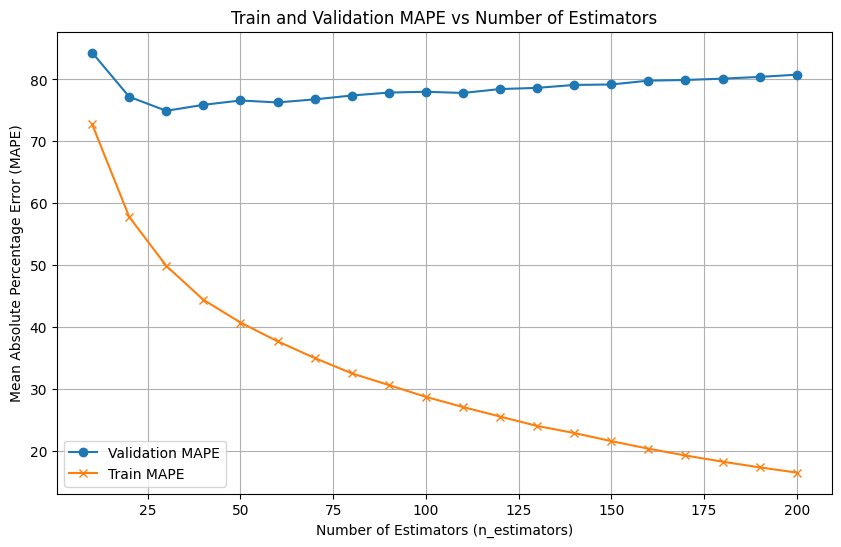

In [ ]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
import matplotlib.pyplot as plt

param_grid_lgb = {
    'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                     110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
}

lgb_model = lgb.LGBMRegressor()

grid_search_lgb = GridSearchCV(estimator=lgb_model, param_grid=param_grid_lgb,
                               cv=kf, scoring='neg_mean_absolute_percentage_error',
                               verbose=1, n_jobs=-1, return_train_score=True)

grid_search_lgb.fit(X_train, y_train.ravel())

mean_test_scores = -grid_search_lgb.cv_results_['mean_test_score'] * 100
mean_train_scores = -grid_search_lgb.cv_results_['mean_train_score'] * 100
n_estimators_range = param_grid_lgb['n_estimators']

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, mean_test_scores, label='Validation MAPE', marker='o')
plt.plot(n_estimators_range, mean_train_scores, label='Train MAPE', marker='x')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Mean Absolute Percentage Error (MAPE)')
plt.title('Train and Validation MAPE vs Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

param_grid_lgb = {
    'boosting_type': ["dart"], # ["rf", "gbdt", "dart"]
    'n_estimators': [100, 200, 400],
    'learning_rate': [0.001, 0.01, 0.1],
    'num_leaves': [5, 10, 20],
    'max_depth': [5, 7, 10],
    'min_data_in_leaf': [5, 10, 20],
    'feature_fraction': [0.2, 0.5, 1.0],
    'force_col_wise=true': [True]
}

lgb_model = lgb.LGBMRegressor()

grid_search_lgb = GridSearchCV(estimator=lgb_model, param_grid=param_grid_lgb,
                               cv=kf, scoring='neg_mean_absolute_percentage_error',
                               verbose=1, n_jobs=-1)

grid_search_lgb.fit(X_train, y_train.ravel())  # y_train.ravel() to convert y_train to 1D array

best_params_lgb = grid_search_lgb.best_params_
best_score_lgb = -grid_search_lgb.best_score_ * 100  # Converting score to positive MAPE value

best_params_lgb, best_score_lgb

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
[LightGBM] [Warning] Unknown parameter force_col_wise=true=True
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] Unknown parameter force_col_wise=true=True
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 533
[LightGBM] [Info] Number of data points in the train set: 296, number of used features: 10
[LightGBM] [Info] Start training f

({'boosting_type': 'dart',
  'feature_fraction': 1.0,
  'force_col_wise=true': True,
  'learning_rate': 0.01,
  'max_depth': 5,
  'min_data_in_leaf': 5,
  'n_estimators': 200,
  'num_leaves': 20},
 54.85261620220696)

In [ ]:
# pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.2 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
import os
import sys
from contextlib import contextmanager

# If an algorithm produces too many warning messages, skip them with this:
@contextmanager
def suppress_stdout_stderr():
    """A context manager that redirects stdout and stderr to devnull"""
    with open(os.devnull, 'w') as devnull:
        old_stdout = sys.stdout
        old_stderr = sys.stderr
        sys.stdout = devnull
        sys.stderr = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout
            sys.stderr = old_stderr

def objective(trial, params_dict):
    with suppress_stdout_stderr():
        param = {
            'boosting_type': 'dart',
            'n_estimators': trial.suggest_categorical('n_estimators', params_dict['n_estimators']),
            'learning_rate': trial.suggest_categorical('learning_rate', params_dict['learning_rate']),
            'num_leaves': trial.suggest_categorical('num_leaves', params_dict['num_leaves']),
            'max_depth': trial.suggest_categorical('max_depth', params_dict['max_depth']),
            'min_data_in_leaf': trial.suggest_categorical('min_data_in_leaf', params_dict['min_data_in_leaf']),
            'feature_fraction': trial.suggest_categorical('feature_fraction', params_dict['feature_fraction']),
            'force_col_wise': True
        }

        lgbm = lgb.LGBMRegressor(**param)

        scores = cross_val_score(lgbm, X_train, y_train.ravel(),
                                 cv=kf, scoring='neg_mean_absolute_percentage_error')

        mape_score = -scores.mean()

        return mape_score

params_dict = {
    'n_estimators': [100, 200, 400],
    'learning_rate': [0.001, 0.01, 0.1],
    'num_leaves': [5, 10, 20],
    'max_depth': [5, 7, 10],
    'min_data_in_leaf': [5, 10, 20],
    'feature_fraction': [0.2, 0.5, 1.0]
}

study = optuna.create_study(direction='minimize')
study.optimize(lambda trial: objective(trial, params_dict), n_trials=100)

# Best parameters and score
best_params = study.best_params
best_score = study.best_value

print(f"Best parameters: {best_params}")
print(f"Best MAPE score: {best_score * 100}")


Best parameters: {'n_estimators': 200, 'learning_rate': 0.01, 'num_leaves': 10, 'max_depth': 10, 'min_data_in_leaf': 10, 'feature_fraction': 1.0}
Best MAPE score: 55.07660811697226


Optuna provides the following sampling algorithms:

Grid Search implemented in GridSampler

Random Search implemented in RandomSampler

Tree-structured Parzen Estimator algorithm implemented in TPESampler

CMA-ES based algorithm implemented in CmaEsSampler

Algorithm to enable partial fixed parameters implemented in PartialFixedSampler

Nondominated Sorting Genetic Algorithm II implemented in NSGAIISampler

A Quasi Monte Carlo sampling algorithm implemented in QMCSampler

In [ ]:
# With Genetic Algorithm:

params_dict = {
    'n_estimators': [100, 200, 400],
    'learning_rate': [0.001, 0.01, 0.1],
    'num_leaves': [5, 10, 20],
    'max_depth': [5, 7, 10],
    'min_data_in_leaf': [5, 10, 20],
    'feature_fraction': [0.2, 0.5, 1.0]
}

study = optuna.create_study(direction='minimize',
                            sampler=optuna.samplers.NSGAIISampler())

study.optimize(lambda trial: objective(trial, params_dict), n_trials=100)

# Best parameters and score
best_params = study.best_params
best_score = study.best_value

print(f"Best parameters: {best_params}")
print(f"Best MAPE score: {best_score * 100}")

Best parameters: {'n_estimators': 200, 'learning_rate': 0.01, 'num_leaves': 5, 'max_depth': 5, 'min_data_in_leaf': 10, 'feature_fraction': 1.0}
Best MAPE score: 55.15289467837397


In [ ]:
# Genetic algorithm with less n_trials
study = optuna.create_study(
    direction='minimize',
    sampler=optuna.samplers.NSGAIISampler()
)
study.optimize(lambda trial: objective(trial, params_dict), n_trials=50)

# Best parameters and score
best_params = study.best_params
best_score = study.best_value

print(f"Best parameters: {best_params}")
print(f"Best MAPE score: {best_score * 100}")

Best parameters: {'n_estimators': 200, 'learning_rate': 0.01, 'num_leaves': 10, 'max_depth': 5, 'min_data_in_leaf': 5, 'feature_fraction': 1.0}
Best MAPE score: 55.1329134542369


In [ ]:
# Genetic algorithm with less n_trials
study = optuna.create_study(
    direction='minimize',
    sampler=optuna.samplers.NSGAIISampler()
)
study.optimize(lambda trial: objective(trial, params_dict), n_trials=20)

# Best parameters and score
best_params = study.best_params
best_score = study.best_value

print(f"Best parameters: {best_params}")
print(f"Best MAPE score: {best_score * 100}")

Best parameters: {'n_estimators': 200, 'learning_rate': 0.01, 'num_leaves': 5, 'max_depth': 7, 'min_data_in_leaf': 20, 'feature_fraction': 1.0}
Best MAPE score: 55.40537551755897


In [ ]:
# Change parameters
params_dict = {
    'n_estimators': [150, 200, 250],
    'learning_rate': [0.007, 0.01, 0.02],
    'num_leaves': [7, 10, 13],
    'max_depth': [4, 7, 10],
    'min_data_in_leaf': [7, 10, 13],
    'feature_fraction': [0.8, 1.0]
}

study = optuna.create_study(
    direction='minimize',
    sampler=optuna.samplers.NSGAIISampler()
)
study.optimize(lambda trial: objective(trial, params_dict), n_trials=100)

# Best parameters and score
best_params = study.best_params
best_score = study.best_value

print(f"Best parameters: {best_params}")
print(f"Best MAPE score: {best_score * 100}")

Best parameters: {'n_estimators': 250, 'learning_rate': 0.01, 'num_leaves': 10, 'max_depth': 4, 'min_data_in_leaf': 13, 'feature_fraction': 1.0}
Best MAPE score: 54.36356073698384


In [ ]:
# Change parameters
params_dict = {
    'n_estimators': [230, 250, 270],
    'learning_rate': [0.009, 0.01, 0.015],
    'num_leaves': [9, 10, 11],
    'max_depth': [3, 4, 5],
    'min_data_in_leaf': [12, 13, 14],
    'feature_fraction': [0.9, 1.0]
}

study = optuna.create_study(
    direction='minimize',
    sampler=optuna.samplers.NSGAIISampler()
)
study.optimize(lambda trial: objective(trial, params_dict), n_trials=100)

# Best parameters and score
best_params = study.best_params
best_score = study.best_value

print(f"Best parameters: {best_params}")
print(f"Best MAPE score: {best_score * 100}")

Best parameters: {'n_estimators': 250, 'learning_rate': 0.01, 'num_leaves': 9, 'max_depth': 4, 'min_data_in_leaf': 12, 'feature_fraction': 1.0}
Best MAPE score: 54.152829058538224


In [ ]:
# Check on test data
lgbm = lgb.LGBMRegressor(**best_params)
lgbm.fit(X_train, y_train)
y_pred_test = lgbm.predict(X_test)
print(mean_absolute_percentage_error(y_test, y_pred_test) * 100)

[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 533
[LightGBM] [Info] Number of data points in the train set: 296, number of used features: 10
[LightGBM] [Info] Start training from score 0.401630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning